In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.cm as cm

from instances.parser import *

from math import atan, cos, sin, pi

from E3PNT.e3pnt import *
from E3PNT.poly_function import *
from E2PNT.TwoPointEllipse import *

import time
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
#mp.rcParams['text.usetex'] = True
#mp.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

<IPython.core.display.Javascript object>


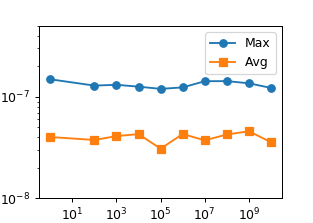

<IPython.core.display.Javascript object>


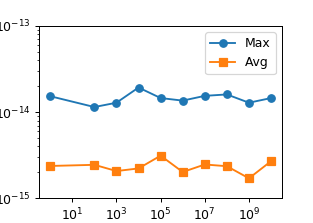

In [15]:
markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

nexp = 100
nsols = 0
error_by_K = dict()
error2_by_K = dict()
error_by_K_avg = dict()
error2_by_K_avg = dict()

error_by_K_noref = dict()
error2_by_K_noref = dict()


for K in [1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]:
    error = []
    error2 = []
    error_noref = []
    error2_noref = []

    for cnt in range(nexp):
        a = 2 * K
        b = 1 * K
        tt = np.random.rand(3) * 2*pi
        tt = [0, pi/2, pi]
        xxs = a * np.cos(tt)
        yys = b * np.sin(tt)
        
        thh = np.random.rand(1) * pi
        
        xs = [0,0,0]
        ys = [0,0,0]
        
        for i in range(3):
            xs[i] = xxs[i] * cos(thh) + yys[i] * sin(thh)
            ys[i] = -xxs[i] * sin(thh) + yys[i] * cos(thh)
            
        sols = e3pnt(a, b, xs, ys, False, True)
        sols2 = e3pnt(a, b, xs, ys, False, True)

        if len(sols) > 0:
            nsols += 1
            for sol in sols:
                xc, yc, theta, err = sol
                error.append(sol_error(a, b, theta, xc, yc, xs, ys))
                error2.append(err)
                
            for sol in sols2:    
                xc, yc, theta, err = sol
                error_noref.append(sol_error(a, b, theta, xc, yc, xs, ys))
  
    error_by_K[K] = max(error)
    error2_by_K[K] = max(error2)

    error_by_K_avg[K] = np.mean(error)
    error2_by_K_avg[K] = np.mean(error2)

    error_by_K_noref[K] = np.mean(error_noref)


fig, ax = plt.subplots(figsize=(3.5, 2.5))

fig2, ax2 = plt.subplots(figsize=(3.5, 2.5))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('K')
ax.set_ylabel('Distance to the unit circle')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('K')
ax2.set_ylabel('Error')

#ax2.plot(error2_by_K.keys(), error2_by_K.values(), 'o-', label='Max Error2')

ax2.plot(error_by_K.keys(), error_by_K.values(), 'o-', label='Max')
ax2.plot(error_by_K_avg.keys(), error_by_K_avg.values(), 's-', label='Avg')

ax.plot(error2_by_K.keys(), error2_by_K.values(), 'o-', label='Max')
ax.plot(error2_by_K_avg.keys(), error2_by_K_avg.values(), 's-', label='Avg')

ax2.legend()
ax2.set_ylim(1e-15, 1e-13)
ax.set_ylim(1e-8, 5e-7)
ax.legend()
fig2.savefig('e3p_known_sols1.pdf', bbox_inches='tight')
fig.savefig('e3p_known_sols2.pdf', bbox_inches='tight')



In [ ]:
markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

nexp = 100
nsols = 0
error_by_K = dict()
error2_by_K = dict()
error_by_K_avg = dict()
error_by_K_noref = dict()
error2_by_K_noref = dict()


for K in [1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]:
    error = []
    error2 = []
    error_noref = []
    error2_noref = []

    for cnt in range(nexp):
        a = 2 * K
        b = 1 * K
        tt = np.random.rand(3) * 2*pi
        tt = [0, pi/2, pi]
        xxs = a * np.cos(tt)
        yys = b * np.sin(tt)
        
        thh = np.random.rand(1) * pi
        
        xs = [0,0,0]
        ys = [0,0,0]
        
        for i in range(3):
            xs[i] = xxs[i] * cos(thh) + yys[i] * sin(thh)
            ys[i] = -xxs[i] * sin(thh) + yys[i] * cos(thh)
            
        sols = e3pnt(a, b, xs, ys, False, True)
        sols2 = e3pnt(a, b, xs, ys, False, True)

        if len(sols) > 0:
            nsols += 1
            for sol in sols:
                xc, yc, theta, err = sol
                error.append(sol_error(a, b, theta, xc, yc, xs, ys))
            for sol in sols2:    
                xc, yc, theta, err = sol
                error_noref.append(sol_error(a, b, theta, xc, yc, xs, ys))
  
    error_by_K[K] = max(error)
    error_by_K_avg[K] = np.mean(error)
    error_by_K_noref[K] = np.mean(error_noref)


fig2, ax2 = plt.subplots(figsize=(3, 2.2))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('K')
ax2.set_ylabel('Error')

#ax2.plot(error2_by_K.keys(), error2_by_K.values(), 'o-', label='Max Error2')

ax2.plot(error_by_K.keys(), error_by_K.values(), 'o-', label='Max')
#ax2.plot(error_by_K_noref.keys(), error_by_K_noref.values(), 'o-', label='No Poli')

ax2.plot(error_by_K_avg.keys(), error_by_K_avg.values(), 'o-', label='Avg')

ax2.legend()
ax2.set_ylim(1e-15, 1e-13)
fig2.savefig('e3p_known_sols2.pdf', bbox_inches='tight')



220
208
206
208
200
204
204
208
212
204


<IPython.core.display.Javascript object>


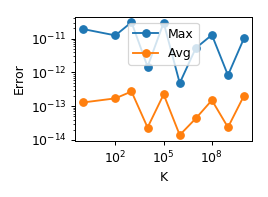

----- Sols proportion
10.0
----- Error ------
1.0356345410874232e-11 2.0656171036527513e-13
0


In [5]:

I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

running_time = []

n = 100
nsols = 0

K=1000

error_by_K = dict()

error2_by_K = dict()
error_by_K_avg = dict()

error_by_K_noref = dict()
error2_by_K_noref = dict()

nosol_cnt = 0
sol_cnt = 0

for K in [1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9, 1e10]:
    error = []
    error2 = []
    error_noref = []
    error2_noref = []

    
    for cnt in range(n):
        a = 2 * K
        b = 1 * K
        tt = np.random.rand(3) * 2*pi
        
        xs = a * np.cos(tt)
        ys = b * np.sin(tt)
            
        sols = e3pnt(a, b, xs, ys, False, True)
        sols2 = e3pnt(a, b, xs, ys, False, True)

        if len(sols) > 0:
            nsols += 1
            for sol in sols:
                xc, yc, theta, err = sol
                #error.append(err)
                error.append(sol_error(a, b, theta, xc, yc, xs, ys))
            for sol in sols2:    
                xc, yc, theta, err = sol
                #error_noref.append(sol_error(a, b, theta, xc, yc, xs, ys))
                #error_noref.append(err)
                error_noref.append(angle_error(theta, a, b, xs, ys))

                #error_noref.append(angle_error(theta, a, b, xs, ys))
    
    print(len(error))
    error_by_K[K] = max(error)
    #error2_by_K[K] = max(error2)
    error_by_K_avg[K] = np.mean(error)
    error_by_K_noref[K] = np.mean(error_noref)
    #error2_by_K_noref[K] = np.mean(error2_noref)


fig2, ax2 = plt.subplots(figsize=(3, 2.2))
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xlabel('K')
ax2.set_ylabel('Error')

#ax2.plot(error2_by_K.keys(), error2_by_K.values(), 'o-', label='Max Error2')

ax2.plot(error_by_K.keys(), error_by_K.values(), 'o-', label='Max')
ax2.plot(error_by_K_avg.keys(), error_by_K_avg.values(), 'o-', label='Avg')
#ax2.plot(error_by_K_noref.keys(), error_by_K_noref.values(), 'o-', label='Avg. Error no polishing')
#ax2.plot(error2_by_K_noref.keys(), error_by_K_noref.values(), 'o-', label='Avg. Error polishing')

ax2.legend()

plt.tight_layout()
 
fig2.savefig('e3p_error.pdf')

#print(max(running_time), np.mean(running_time))
print("----- Sols proportion")
print(nsols/n)

print("----- Error ------")
print(max(error), np.mean(error))
print(nosol_cnt)

1.818653347947321


<IPython.core.display.Javascript object>


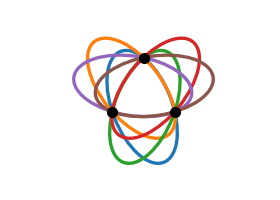

0.0030050277709960938 0.0030050277709960938


In [32]:
I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

running_time = []

a = 2
b = 1

n = len(X)
m = len(I.a)
#print(X)
#print(Y)

for l in [2.1]:
    #h=1.5
    h = sqrt(3)/2 * l
    X = [0, l/2, l]
    Y = [0, h, 0]
    
    #X = [0, a, 2*a]
    #Y = [0, b, 0]
    
    n = len(X)

   # print(a, b)
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):

                xs = [X[i], X[j], X[k]]
                ys = [Y[i], Y[j], Y[k]]

                t1 = time.time()
                sols = e3pnt(a, b, xs, ys)
                running_time.append(time.time() - t1)
                
                if len(sols) == 0:
                   # print("A")
                    continue
                else:
                    print(h)
                    
                #fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
                fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(3.5, 2.5))
                ax.axis('off')
                
                csl = 0
                for sol in sols:
                    xc, yc, theta = sol
                    #print(f"{xc}, {yc}, {theta} ->>>> {xs} ------->>>> {ys}")
                    E=mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180, color=colors[csl], lw=3, alpha=1)
                    ax.add_patch(E)
                    #ax.autoscale(tight=True)
                    csl += 1
                
                ax.scatter(xs, ys, lw=4, zorder=100, color='black')
                ax.autoscale(tight=True)
                ax.margins(0.1)

                fig.savefig('e3p_6sols.pdf', bbox_inches="tight")

                

print(max(running_time), np.mean(running_time))

1.6021469970012114


<IPython.core.display.Javascript object>


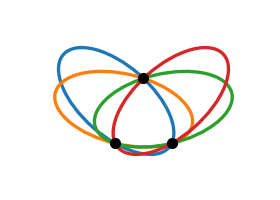

0.002088308334350586 0.002088308334350586


In [36]:
I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

running_time = []

a = 2
b = 1

n = len(X)
m = len(I.a)
#print(X)
#print(Y)

for l in [1.85]:
    #h=1.5
    h = sqrt(3)/2 * l
    X = [0, h/2, h]
    Y = [0, l, 0]
    
    #X = [0, a, 2*a]
    #Y = [0, b, 0]
    
    n = len(X)

   # print(a, b)
    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):

                xs = [X[i], X[j], X[k]]
                ys = [Y[i], Y[j], Y[k]]

                t1 = time.time()
                sols = e3pnt(a, b, xs, ys)
                running_time.append(time.time() - t1)
                
                if len(sols) == 0:
                   # print("A")
                    continue
                else:
                    print(h)
                    
                #fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
                fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(3.5, 2.5))
                ax.axis('off')
                
                csl = 0
                for sol in sols:
                    xc, yc, theta = sol
                    #print(f"{xc}, {yc}, {theta} ->>>> {xs} ------->>>> {ys}")
                    E=mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180, color=colors[csl], lw=3, alpha=1)
                    ax.add_patch(E)
                    #ax.autoscale(tight=True)
                    csl += 1
                
                ax.scatter(xs, ys, lw=4, zorder=100, color='black')
                ax.autoscale(tight=True)
                ax.margins(0.1)

                fig.savefig('e3p_4sols.pdf', bbox_inches="tight")

                

print(max(running_time), np.mean(running_time))

In [8]:
%%time

I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y
n = len(X)
m = len(I.a)

markers = ['o', 's', '^', 'h']
ccnt = 0
#print(colors)

running_time = []
error = []

for h in range(1):
    a = I.a[h]
    b = I.b[h]


    for i in range(n):
        for j in range(i+1, n):
            for k in range(j+1, n):

                xs = [X[i], X[j], X[k]]
                ys = [Y[i], Y[j], Y[k]]

                coeff = exp_poly_coeff_t(a, b, xs[1]-xs[0], xs[2]-xs[0], ys[1]-ys[0], ys[2]-ys[0])
                
                #print(coeff)
                t1 = time.time()
                sols = e3pnt(a, b, xs, ys)
                
                if len(sols) > 0:
                    
                    for sol in sols:
                        xc, yc, theta = sol
                        for jj in range(3):
                            error.append(abs(1 - eval_ellipse(theta, a, b, xc, yc, xs[jj], ys[jj])))

                    print(len(sols))
                    
                running_time.append(time.time() - t1)

print(max(running_time), np.mean(running_time))

print("----- Error ------")
print(max(error), np.mean(error))
        


2
0.0012586116790771484 0.0007105129105704171
----- Error ------
6.661338147750939e-16 3.3306690738754696e-16
CPU times: user 107 ms, sys: 2.04 ms, total: 109 ms
Wall time: 105 ms


<IPython.core.display.Javascript object>


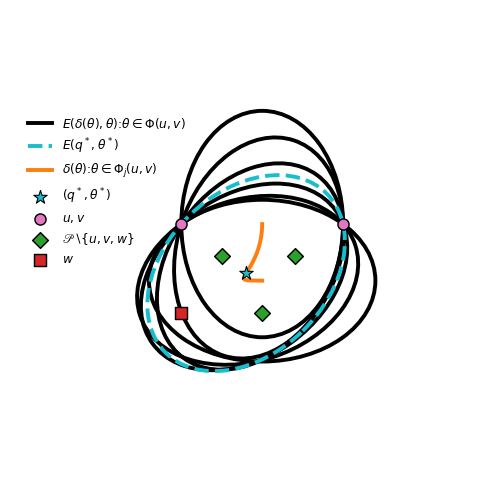

(0, 0), (2, 0) a 1.570790334682444 1.5707963267948966


In [133]:
xs = np.random.random(5)
ys = np.random.random(5)
a = 1.4
b = 1
n = 5

xs = [0, 2]
ys = [0, 0]

n = len(xs)
#fig, ax = get_fig_ax()
#plot_points(ax, xs, ys)

#print(xs)
#print(ys)
hd = False

for i in range(n):
    for j in range(i+1, n):
        
        #if not hd:
        print(f"({xs[i]}, {ys[i]}), ({xs[j]}, {ys[j]})", "a", fint(a, b, [xs[i], xs[j]], [ys[i], ys[j]]), pi/2)
        #fig, ax = get_fig_ax()
        #plot_points(ax, xs, ys)
        #   hd = True
            
        for k in range(j+1, n):
            X = [xs[i], xs[j], xs[k]]
            Y = [xs[i], xs[j], xs[k]]
            
            sols = e3pnt(a, b, X, Y)
            
            print(len(sols))

In [132]:
def fa(ax, theta, a, b, X, Y, plot=True, kwargs={}):
    
    x1, y1 = rot(0, 0, -theta)
    x2, y2 = rot(X[1]-X[0], Y[1]-Y[0], -theta)
    
    sols = two_point_ellipse(a, b, x1, y1, x2, y2, False)
    

    
    #print("b", sols)
    if len(sols)==0:
        return False
    

    xc, yc = sols[0][0]
    xc, yc = rot(xc, yc, theta)
    
   
    if plot:
        xc, yc = sols[0][0]
        xc, yc = rot(xc, yc, theta)
        plot_ellipse(ax, theta, a, b, xc + X[0], yc + Y[0], kwargs)
        #xc, yc = sols[1][0]
        #xc, yc = rot(xc, yc, theta)
        #plot_ellipse(ax, theta, a, b, xc + X[0], yc + Y[0], color=color)
       
    #plot_ellipse(ax, 0, a, b, sols[0][0].x + X[0], sols[0][0].y+Y[0])

    #plot_points(ax, [0, X[1]-X[0]], [0, Y[1]-Y[0]])
    #plot_points(ax, [x1, x2], [y1, y2])
    
    return True


psize = 100
lwsize = 3.5

def fint(a, b, X, Y):
    
    lo = 0
    hi = pi/2
    
       
    fig, ax = get_fig_ax()

    ax.axis('off')
    ax.set_aspect('equal')
    ax.set_xlim(-1.5, 3.1)
    while abs(hi-lo)>1e-5:
        mi=(lo+hi)/2
        if fa(ax, mi, a, b, X, Y, plot=False):
            lo = mi
        else:
            hi = mi
    
    ax.plot([], [], label=r'$E(\delta(\theta), \theta)\colon \theta \in \Phi(u,v)$', color='black', lw=lwsize)

    cn=6
    colors_ = list(map(str,np.linspace(0,.8, cn)))
    
    for cnt, t in enumerate(np.linspace(0, lo, cn)):
        fa(ax, t, a, b, X, Y, True, {'color':'black', 'lw':lwsize})
    
    #opt solution
    th = lo/2.5+0.145
    fa(ax, th, a, b, X, Y, True, {'color':'tab:cyan', 'linestyle':'--', 'lw':lwsize})
    
    
    x1, y1 = rot(0, 0, -th)
    x2, y2 = rot(X[1]-X[0], Y[1]-Y[0], -th)
    sols = two_point_ellipse(a, b, x1, y1, x2, y2, False)
    xc, yc = sols[0][0]
    xc, yc = rot(xc, yc, th)
    #ax.scatter(xc, yc, label=r'$(q_j^*, \theta_j^*)$', marker='*', color='black', s=100, zorder=1000)
    plot_points(ax, [xc], [yc], 1, {'edgecolors':'black', 's': psize+60, 'marker':'*', 'color':'tab:cyan', 'label':r'$(q^*, \theta^*)$'})

    ax.plot([], [], label=r'$E(q^*, \theta^*)$', linestyle='--', color='tab:cyan', lw=lwsize)
        
    xplt = []
    yplt = []
    for theta in np.linspace(0, lo, 1000):
        x1, y1 = rot(0, 0, -theta)
        x2, y2 = rot(X[1]-X[0], Y[1]-Y[0], -theta)
    
        sols = two_point_ellipse(a, b, x1, y1, x2, y2, False)
        
        xc, yc = sols[0][0]
        xc, yc = rot(xc, yc, theta)
        
        xplt.append(xc)
        yplt.append(yc)
    
    ax.plot(xplt, yplt, label=r'$\delta(\theta)\colon \theta \in \Phi_j(u,v)$', lw=lwsize, color=colors[1])
    
    plot_points(ax, X, Y, 1.3,{'edgecolors':'black', 's': psize, 'color':'tab:pink', 'label':r'$u,v$', 'marker':'o'})
    plot_points(ax, [.5, 1, 1.4], [-.4, -1.1, -.4], 1.3, {'edgecolors':'black', 's': psize, 'marker':'D', 'color':'tab:green', 'label':r'$\mathscr{P}$' u'\u2216' r'$\{u,v,w\}$'})
    plot_points(ax, [0], [-1.1], 1.3, {'edgecolors':'black', 's': psize, 'color':'tab:red', 'label':r'$w$', 'marker':'s'})

    
    ax.legend(loc=(-0.1, .4), fontsize='x-medium', frameon=False,prop={"size":11})


    fig.savefig('lema-3-points.pdf', bbox_inches="tight", dpi=300)
        
    return lo

In [41]:
def get_fig_ax():
    #plt.figure(figsize=(12, 9))  

    return plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(6, 6))

def plot_ellipse(ax, theta, a, b, xc=0, yc=0, kwargs={}):
    E=mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180, alpha=1, **kwargs)
    ax.add_patch(E)
    #ax.autoscale(tight=True)

def plot_points(ax, X, Y, lw, kwargs={}):
    ax.scatter(X, Y,linewidths=lw, zorder=100, **kwargs)